In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's first consider the following function:
\begin{align}
y(x) = (x-a)^{2}-(x)_{+}.
\end{align}
The quadratic function is convex, but after subtracting a ReLU $(\cdot)_{+}$, it may not be convex for certain values of $a$. See the following figure.

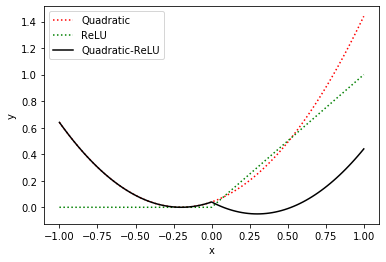

In [2]:
x = np.linspace(-1, 1, 101)
a = -0.2

y1 = (x - a) ** 2
y2 = np.maximum(x, 0)
y3 = y1 - y2

plt.plot(x, y1, 'r:')
plt.plot(x, y2, 'g:')
plt.plot(x, y3, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Quadratic', 'ReLU', 'Quadratic-ReLU'])

plt.show()

Now let's consider a binary classification task. For postive samples,
\begin{align}
P(y=1) = h_{wb}(x) =  \frac{1}{1+\exp(-(wx+b)_{+})}.
\end{align}
For negative samples,
\begin{align}
P(y=0) = 1-h_{wb}(x) = \frac{\exp(-(wx+b)_{+})}{1+\exp(-(wx+b)_{+})}.
\end{align}
For a data set $\{y_{i}, x_{i}\}$, the cost function is
\begin{align}
L(w, b) &= -\sum_{i}\left[ y_{i}\log(h_{wb}(x_{i})) + (1-y_{i})\log(1-h_{wb}(x_{i})) \right] \\
&= \sum_{i}\left[ \log(1+\exp(-(wx_{i}+b)_{+}))+(1-y_{i})(wx_{i}+b)_{+} \right].
\end{align}
Now, consider a specific data set: $\{(y_{1}=1, x_{1}=2), (y_{2}=1, x_{2}=-2), (y_{3}=0, x_{3}=-1), (y_{4}=0, x_{4}=1)\}$:
\begin{align}
L(w, b) &= \log(1+\exp(-(2w+b)_{+})) \\
&+ \log(1+\exp(-(-2w+b)_{+})) \\
&+ \log(1+\exp(-(-w+b)_{+}))+(-w+b)_{+} \\
&+ \log(1+\exp(-(w+b)_{+}))+(w+b)_{+},
\end{align}
which is coded below (set $b=-0.5$):

In [6]:
def activation_leaky_relu(x, alpha_):
    return np.maximum(x, alpha_*x)

def activation_elu(x, alpha_):
    return np.maximum(x, np.exp(x)-1)


def some_cost_function(w, b, activationf, alpha_):
    L = np.log(1+np.exp(-activationf(3.5*w+b, alpha_))) \
      + np.log(1+np.exp(-activationf(-3.5*w+b, alpha_))) \
      + np.log(1+np.exp(-activationf(-0.5*w+b, alpha_))) + activationf(-0.5*w+b, alpha_) \
      + np.log(1+np.exp(-activationf(0.5*w+b, alpha_))) + activationf(0.5*w+b, alpha_) 
    
    return L

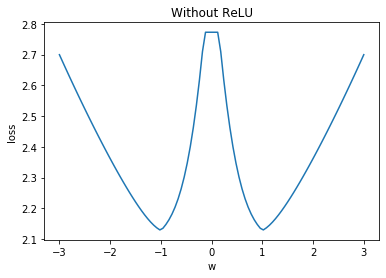

In [8]:
w = np.linspace(-3, 3, 101)
b = -0.5
alpha_ = 0
L = some_cost_function(w, b, activation_leaky_relu, alpha_)

plt.plot(w, L)
plt.xlabel('w')
plt.ylabel('loss')
plt.title('Without ReLU')
plt.show()

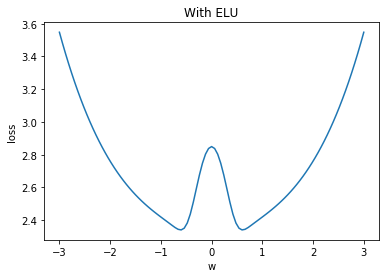

In [9]:
w = np.linspace(-3, 3, 101)
b = -0.5
alpha_ = 1
L = some_cost_function(w, b, activation_elu, alpha_)

plt.plot(w, L)
plt.xlabel('w')
plt.ylabel('loss')
plt.title('With ELU')
plt.show()

2d heatmap, where the black dotted line indicates $b=-0.5$ as in the above.

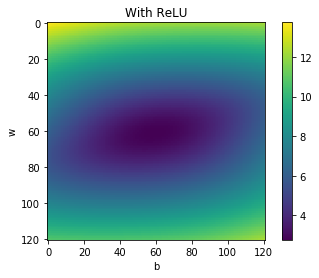

In [151]:
w = np.linspace(-3, 3, 121)
b = np.linspace(-3, 3, 121)
L_2d = np.zeros((121, 121))
alpha_ = 1

for ii in range(121):
    for jj in range(121):
        L_2d[ii, jj] = some_cost_function(w[ii], b[jj], activation_leaky_relu, alpha_)

plt.imshow(L_2d)
# plt.plot([50, 50], [0, 120], 'k:')
# plt.xticks([0, 20, 40, 60, 80, 100, 120], ['-1.2', '-0.8', '-0.4', '0', '0.4', '0.8', '1.2'])
# plt.yticks([0, 20, 40, 60, 80, 100, 120], ['-3', '-2', '-1', '0', '1', '2', '3'])
plt.xlabel('b')
plt.ylabel('w')
plt.title('With ReLU')
plt.colorbar()
plt.show()



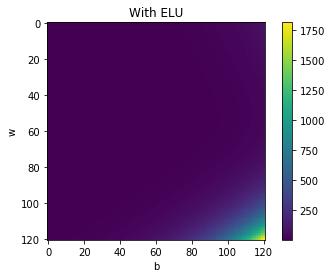

In [157]:
w = np.linspace(-3, 3, 121)
b = np.linspace(-3, 3, 121)
L_2d = np.zeros((121, 121))
alpha_ = 1

for ii in range(121):
    for jj in range(121):
        L_2d[ii, jj] = some_cost_function(w[ii], b[jj], activation_elu, alpha_)

plt.imshow(L_2d)
# plt.plot([50, 50], [0, 120], 'k:')
# plt.xticks([0, 20, 40, 60, 80, 100, 120], ['-1.2', '-0.8', '-0.4', '0', '0.4', '0.8', '1.2'])
# plt.yticks([0, 20, 40, 60, 80, 100, 120], ['-3', '-2', '-1', '0', '1', '2', '3'])
plt.xlabel('b')
plt.ylabel('w')
plt.title('With ELU')
plt.colorbar()
plt.show()

